In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
path = os.path.join(Path().resolve(), 'old_faithful.txt')
xs = np.loadtxt(path)
print(xs.shape)
print(xs[0])

(272, 2)
[ 3.6 79. ]


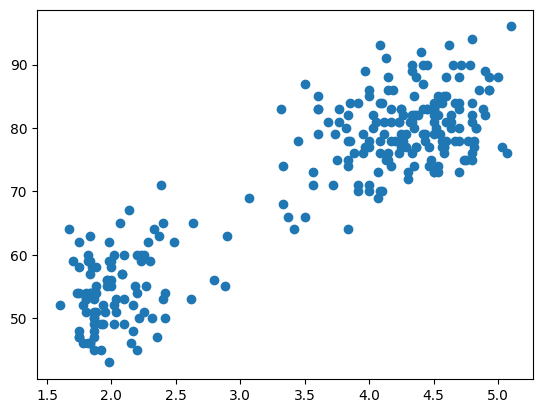

In [4]:
plt.scatter(xs[:,0], xs[:,1])
plt.show()

In [5]:
mus = np.array([[2.0, 4.3],
                [54.5, 80.0]])
covs = np.array([[[0.07, 0.44],
                  [0.44, 33.7]],
                 [[0.17, 0.94],
                  [0.94, 36.0]]])
phis = np.array([0.35, 0.65])

In [6]:
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / (np.sqrt((2*np.pi)**d*det))
    shol = np.multiply(np.tensordot(inv, x - mu, (0, 0)), x - mu).sum(axis=0)
    return z*np.exp(-0.5*shol)

In [7]:
def gmm(x, phis, mus, covs):
    K = len(phis)
    y = 0
    for k in range(K):
        phi, mu, cov = phis[k], mus[:,k].reshape(-1, 1), covs[k]
        y += phi * multivariate_normal(x, mu, cov)
    return y

In [8]:
xs = np.arange(1, 6, 0.1)
ys = np.arange(40, 100, 0.1)
X, Y = np.meshgrid(xs, ys)
Xf = X.flatten()
Yf = Y.flatten()
x = np.vstack([Xf, Yf])
Z = gmm(x, phis, mus, covs).reshape(X.shape)

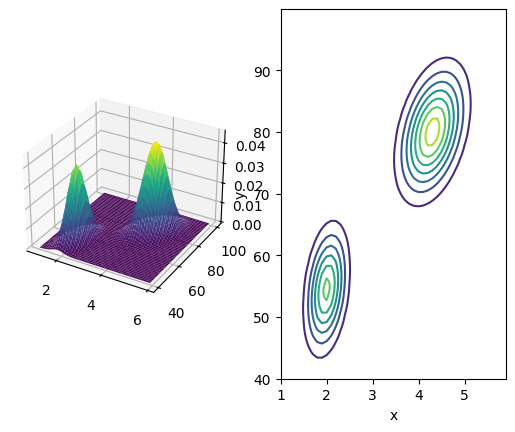

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)

In [ ]:
K = 2
N = len(xs)
D = len(xs[0])

In [14]:

mus = np.random.random((K, D))
covs = np.random.random((K, D, D))
phis = np.random.random(K)
phis = phis / phis.sum()

In [18]:

q = np.random.random((K, N))
q = q / q.sum(axis=0).reshape(1, -1)

In [20]:
for k in range(K):
    q[k] = phis[k] * multivariate_normal(xs, mus[k], covs)
pass